## Eksperimen Decision Tree Learning dan ANN (30 Oktober 2017)

In [25]:
FILE_NAME = 'DatasetEskperimen/CensusIncome/CencusIncome.data.csv'

import pandas as pd
import numpy as np
pd1 = pd.read_csv(FILE_NAME)
print(pd1)

print (dataset)

       age          workclass   fnlwgt      education   education-num  \
0       39          State-gov    77516      Bachelors              13   
1       50   Self-emp-not-inc    83311      Bachelors              13   
2       38            Private   215646        HS-grad               9   
3       53            Private   234721           11th               7   
4       28            Private   338409      Bachelors              13   
5       37            Private   284582        Masters              14   
6       49            Private   160187            9th               5   
7       52   Self-emp-not-inc   209642        HS-grad               9   
8       31            Private    45781        Masters              14   
9       42            Private   159449      Bachelors              13   
10      37            Private   280464   Some-college              10   
11      30          State-gov   141297      Bachelors              13   
12      23            Private   122272      Bachelo

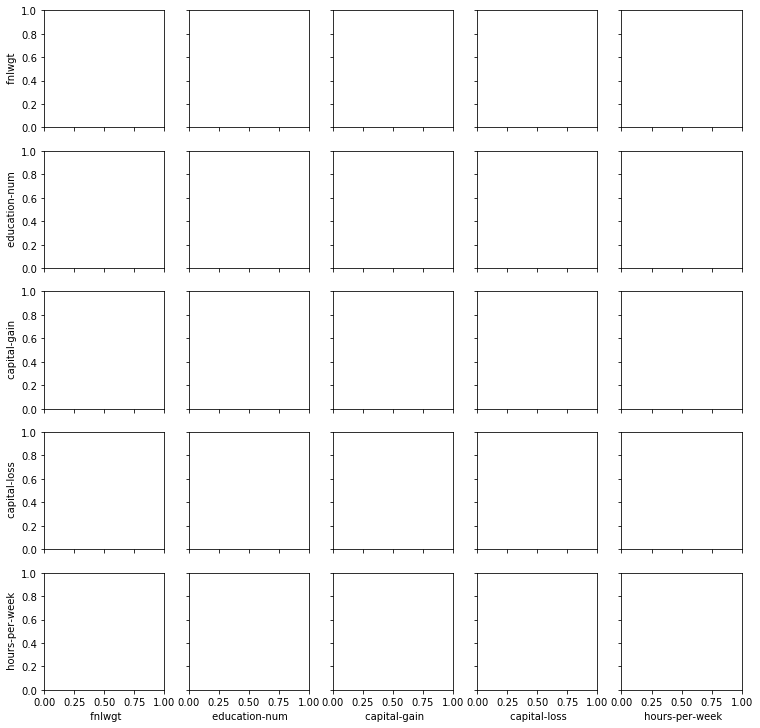

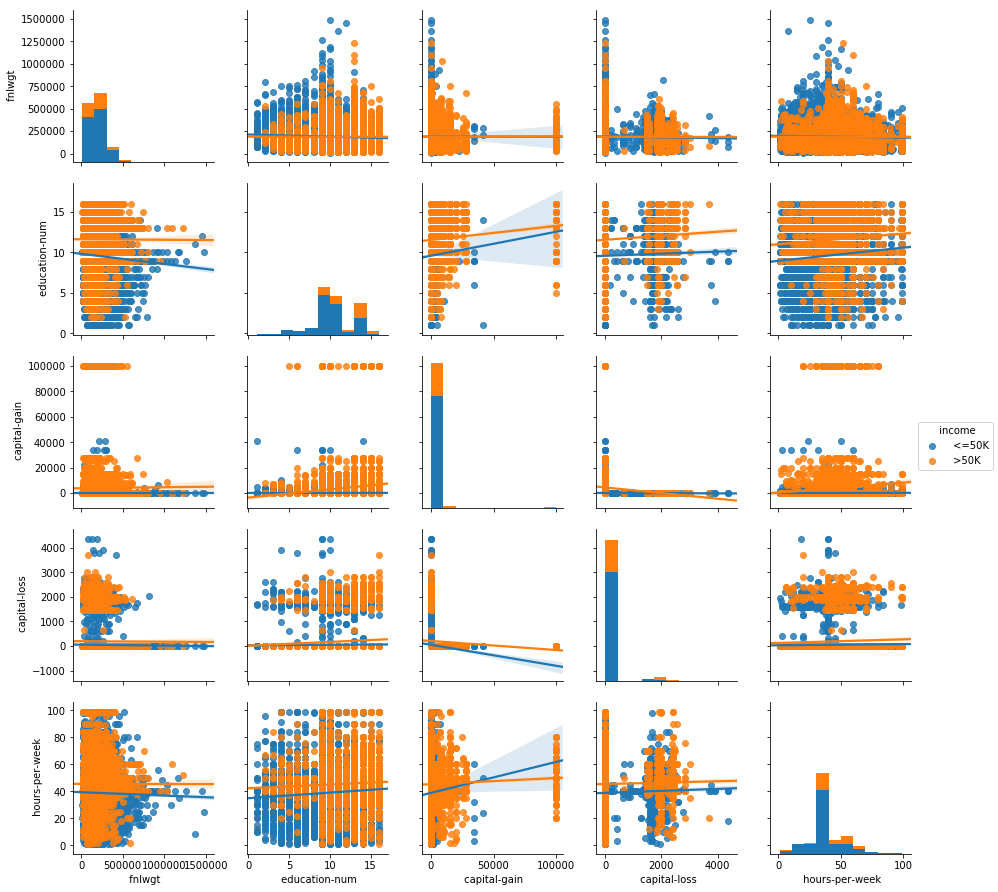

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.pairplot(dataset, hue=' income', kind="reg")
plt.clf()
plt.show()